<a href="https://colab.research.google.com/github/ravikiraniitm17/my_git/blob/master/digits_multi_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import sklearn

In [0]:
"""
Here, each X row is a 8 x 8 image i.e. 64 units representing an image of a digit from (0 to 9)
Hence, X values are the values in the 64 unit matrix while the y is the label of the digit in the image
"""

from sklearn.datasets import load_digits
digits = load_digits()
X= digits.data # .data for X values
y = digits.target # .target for labels
print(X.shape)
print(y.shape)
print(X[0])
print(y)

(1797, 64)
(1797,)
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
[0 1 2 ... 8 9 8]


In [0]:
# data normalization

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(X)

In [0]:
# label one hot encoding

from keras.utils.np_utils import to_categorical
y_categorical = to_categorical(y)

Using TensorFlow backend.


In [0]:
# train test split 

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y_categorical, test_size = 0.4)

In [0]:
# creating the model

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
# training the data

h = model.fit(x_train, y_train, epochs = 100, batch_size = 50, validation_data = (x_test, y_test))


Train on 1078 samples, validate on 719 samples
Epoch 1/100
1078/1078 [==============================] - 0s 278us/step - loss: 1.8926 - accuracy: 0.4174 - val_loss: 1.3715 - val_accuracy: 0.7441
Epoch 2/100
1078/1078 [==============================] - 0s 39us/step - loss: 1.0784 - accuracy: 0.8145 - val_loss: 0.7729 - val_accuracy: 0.8651
Epoch 3/100
1078/1078 [==============================] - 0s 38us/step - loss: 0.6143 - accuracy: 0.8924 - val_loss: 0.4544 - val_accuracy: 0.9138
Epoch 4/100
1078/1078 [==============================] - 0s 37us/step - loss: 0.3653 - accuracy: 0.9323 - val_loss: 0.2948 - val_accuracy: 0.9402
Epoch 5/100
1078/1078 [==============================] - 0s 38us/step - loss: 0.2372 - accuracy: 0.9545 - val_loss: 0.2159 - val_accuracy: 0.9583
Epoch 6/100
1078/1078 [==============================] - 0s 37us/step - loss: 0.1637 - accuracy: 0.9666 - val_loss: 0.1788 - val_accuracy: 0.9624
Epoch 7/100
1078/1078 [==============================] - 0s 40us/step - loss

In [0]:
# make predictions

predictions = model.predict(x_test)

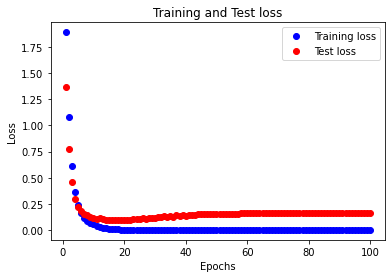

In [0]:
# plotting loss

import matplotlib.pyplot as plt

history_dict =  h.history

train_loss = history_dict['loss']
test_loss = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy'])+1)

plt.plot(epochs, train_loss, 'bo', label = 'Training loss')
plt.plot(epochs, test_loss, 'ro', label = 'Test loss')
plt.title('Training and Test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()